# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

# Importing dataset

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## spliting in x and y 

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

#### standarization

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

![](Seq_api.png "Title")

# model development

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),  # FOR 1st layer we have to provide input_shape
    # no of independent variables in dataset is 8 hence input_shape = 8
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
    # regression problem hence single neuron
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])    # mean absolute error 

C:\Users\PRANIL\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
# running this code for 2 times means running 40 epochs as keras stores values in memory 

Epoch 1/20
363/363 [==============================] - 0s 896us/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 0s 806us/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 0s 827us/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 0s 872us/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 0s 834us/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 0s 880us/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 0s 977us/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 0s 1ms/s

In [19]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 735us/step - loss: 0.3596 - mae: 0.4269


### mean absolute error is 0.4269 and mean square error is 0.3596

In [20]:
model_history.history  # gives values of this matrices in the form of dictionary 

{'loss': [0.3948921859264374,
  0.3922426402568817,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.38287150859832764,
  0.3807542622089386,
  0.3787875175476074,
  0.37684163451194763,
  0.3748517632484436,
  0.37324920296669006,
  0.3715410530567169,
  0.3699612319469452,
  0.3684478998184204,
  0.3671063184738159,
  0.36586254835128784,
  0.36476606130599976,
  0.36347639560699463,
  0.36216965317726135,
  0.36128607392311096],
 'mae': [0.448872447013855,
  0.44692230224609375,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.44146016240119934,
  0.4398253858089447,
  0.4384708106517792,
  0.43753162026405334,
  0.43594637513160706,
  0.4347257614135742,
  0.4335673749446869,
  0.4326501488685608,
  0.4315134882926941,
  0.43066588044166565,
  0.4304641783237457,
  0.4293918311595917,
  0.42838096618652344,
  0.4272271990776062,
  0.42688849568367004],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.3646637797355652,
  0.363212

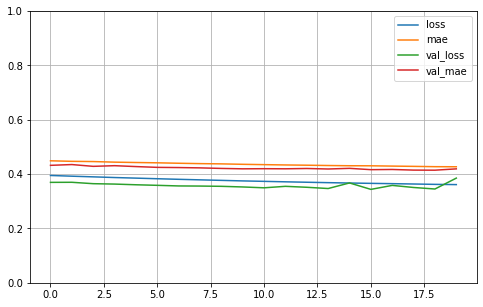

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [22]:
X_new = X_test[:3]

In [23]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.60721976]
 [1.8602647 ]
 [3.792632  ]]
[0.477   0.458   5.00001]


In [24]:
del model

In [25]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [26]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)   # it is called as function hence it is called as fun API
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [28]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

C:\Users\PRANIL\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [29]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 1s 1ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/80
363/363 [==============================] - 0s 890us/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/80
363/363 [==============================] - 0s 884us/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/80
363/363 [==============================] - 0s 1ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/80
363/363 [==============================] - 0s 1ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/80
363/363 [==============================] - 0s 1ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/80
363/363 [==============================] - 0s 926us/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/80
363/363 [==============================] - 0s 870us/step - 

Epoch 62/80
363/363 [==============================] - 0s 846us/step - loss: 0.3556 - mae: 0.4225 - val_loss: 0.3695 - val_mae: 0.4167
Epoch 63/80
363/363 [==============================] - 0s 891us/step - loss: 0.3543 - mae: 0.4214 - val_loss: 0.3630 - val_mae: 0.4180
Epoch 64/80
363/363 [==============================] - 0s 881us/step - loss: 0.3544 - mae: 0.4217 - val_loss: 0.3433 - val_mae: 0.4145
Epoch 65/80
363/363 [==============================] - 0s 931us/step - loss: 0.3537 - mae: 0.4213 - val_loss: 0.3548 - val_mae: 0.4143
Epoch 66/80
363/363 [==============================] - 0s 877us/step - loss: 0.3530 - mae: 0.4206 - val_loss: 0.3570 - val_mae: 0.4142
Epoch 67/80
363/363 [==============================] - 0s 914us/step - loss: 0.3524 - mae: 0.4202 - val_loss: 0.3722 - val_mae: 0.4162
Epoch 68/80
363/363 [==============================] - 0s 833us/step - loss: 0.3520 - mae: 0.4198 - val_loss: 0.3612 - val_mae: 0.4137
Epoch 69/80
363/363 [==============================] - 

In [30]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 648us/step - loss: 0.3453 - mae: 0.4147


### mean absolute error is 0.4147 and mean square error is 0.3453

In [31]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.45896390080451965,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.42534440755844116,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860719680786,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454246997833,
  0.3971883952617645,
  0.3946213722229004,
  0.39249086380004883,
  0.3904934525489807,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295263051986694,
  0.3815838396549225,
  0.38052698969841003,
  0.3787004351615906,
  0.3775610029697418,
  0.3762996792793274,
  0.3750821352005005,
  0.3740888237953186,
  0.37281912565231323,
  0.37164339423179626,
  0.37105101346969604,
  0.37027257680892944,
  0.36904579401016235,
  0.3680413067340851,
  0.367731

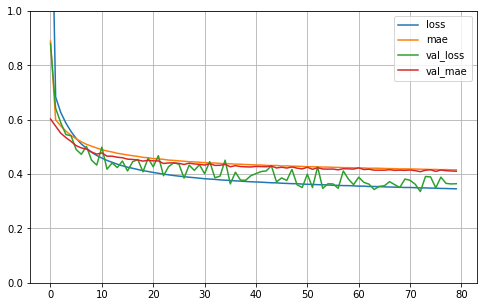

In [32]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()